# Implementação das funções de pertinência

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import *
from sklearn.metrics import mean_squared_error
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
def trimf(x,a,b,c):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = max([min([(x[i]-a)/(b-a), (c-x[i])/(c-b)]), 0])
    return y

def gaussmf(x,c,sigma):
    return e**(-1/2 * ((x-c)/sigma)**2)

def trapmf(x,a,b,c,d):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > a and x[i] <= b:
            y[i] = (x[i]-a)/(b-a)
        if x[i] > b and x[i] <= c:
            y[i] = 1
        if x[i] > c and x[i] < d:
            y[i] = (-x[i]+d)/(-c+d)
    return y

def gbellmf(x, a, b, c):
    return 1/(1+abs(((x-c)/a)**(2*b)))

def sigmf(x, c, a):
    return 1/(1 + e**(-a*(x-c)))   

## Mecanismo de Inferência de Sugeno (Constante)

### Definindo y1 e y2

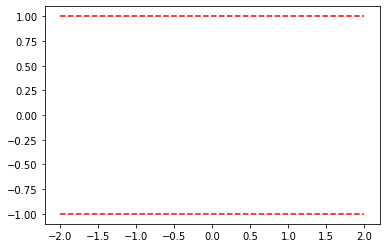

In [3]:
x = np.linspace(-2,2, 200)
y = np.linspace(-1, 1, 200)
y1 = np.ones(len(x))*-1
y2 = np.ones(len(x))*1
plt.plot(x,y1,'r--', x, y2, 'r--')

### Funções de pertinencia

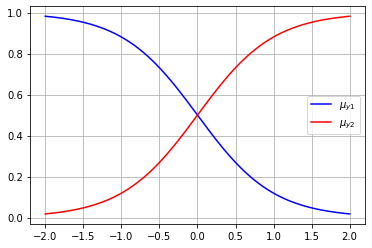

In [6]:
mu_y1 = sigmf(x, 0, -2)
mu_y2 = sigmf(x, 0, 2)
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

### Resultado

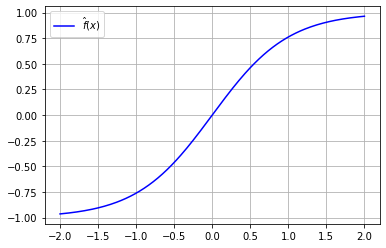

In [7]:
div = mu_y1 + mu_y2
div[div==0] = 0.00001
y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-')
legend = plt.legend([r'$\hat{f}(x)$'])
plt.grid()